Extracting and Loading data

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
#Loading the csv into pandas dataframe
raw_data = pd.read_csv('Dataset-Assignment_1.csv')
raw_data.head(n = 5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
#showing summary
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
#calculating mean househild income
household_income_mean = raw_data['median_income'].mean()
print(household_income_mean)

3.8706710029069766


Cleaning Data

In [5]:
raw_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
#Converting categorical feature into numerical
raw_data['ocean_proximity'] = raw_data['ocean_proximity'].map({'NEAR BAY':1, '<1H OCEAN':2, 'INLAND':3, 'NEAR OCEAN':4, 'ISLAND':5})

In [7]:
#checking null and infinities and removing them
raw_data= raw_data.replace([np.inf, -np.inf], np.nan)



In [8]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,1


In [9]:
# drop any rows with NaN values
raw_data = raw_data.dropna()

In [10]:
raw_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
raw_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,1


In [12]:
cleaned_data = raw_data

In [13]:
cleaned_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,1


Data Visualization

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\3389199008.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['housing_median_age'])


<Axes: xlabel='housing_median_age', ylabel='Density'>

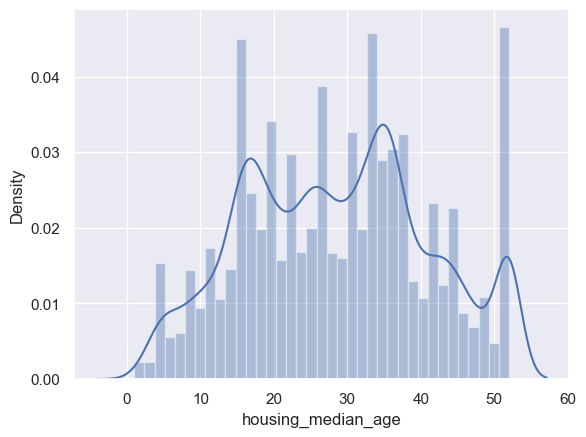

In [14]:
#checking and removing outliers
sns.distplot(cleaned_data['housing_median_age'])

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\3235571241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['latitude'])


<Axes: xlabel='latitude', ylabel='Density'>

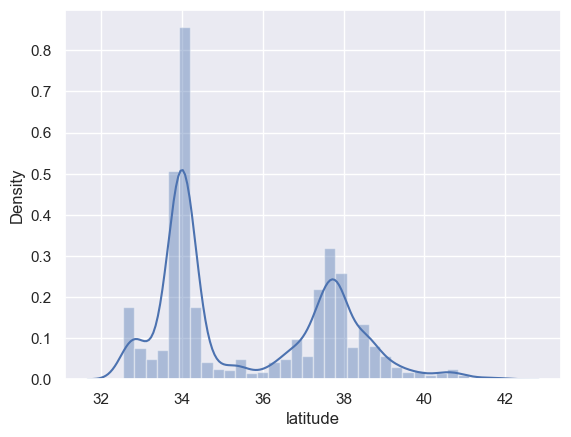

In [15]:
sns.distplot(cleaned_data['latitude'])

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\762645832.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['latitude'])


<Axes: xlabel='latitude', ylabel='Density'>

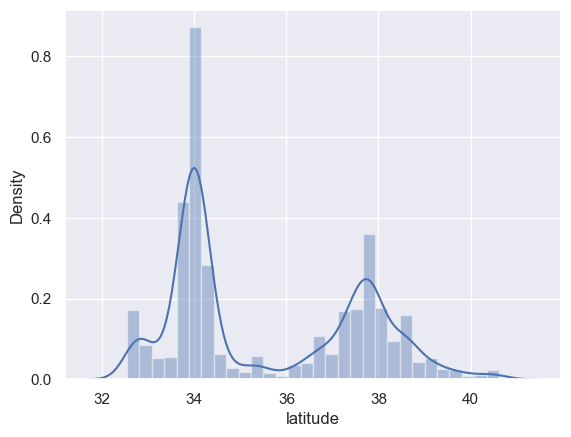

In [16]:
q = cleaned_data['latitude'].quantile(0.99)
data1 = cleaned_data[cleaned_data['latitude']<q]
sns.distplot(data1['latitude'])

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\1527651305.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['median_income'])


<Axes: xlabel='median_income', ylabel='Density'>

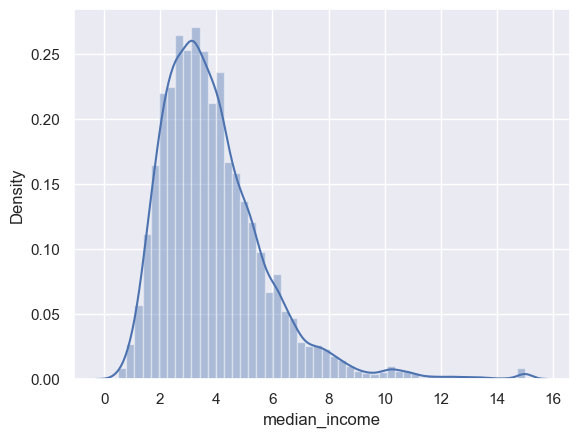

In [17]:
sns.distplot(data1['median_income'])


C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\1798281893.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['median_income'])


<Axes: xlabel='median_income', ylabel='Density'>

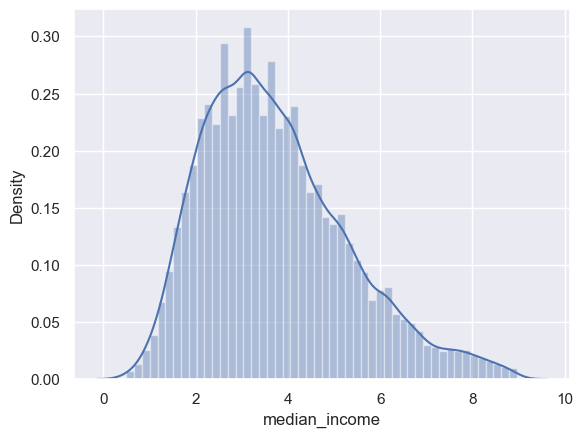

In [18]:
q = data1['median_income'].quantile(0.98)
data2 = data1[data1['median_income']<q]
sns.distplot(data2['median_income'])

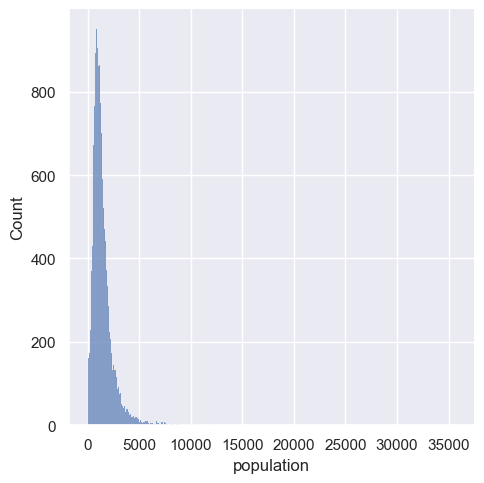

In [19]:
sns.displot(data2['population'])

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\975233754.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['population'])


<Axes: xlabel='population', ylabel='Density'>

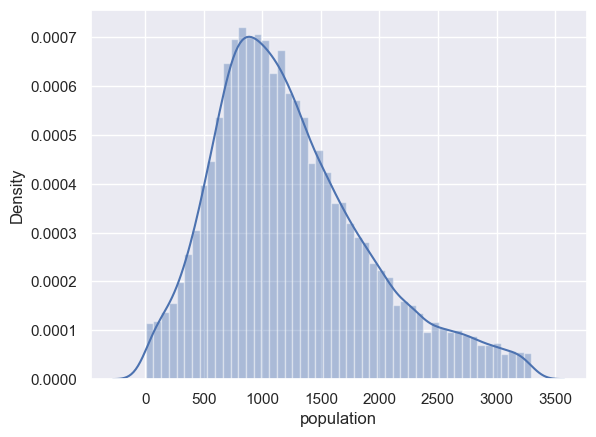

In [20]:
q = data2['population'].quantile(0.95)
data3 = data2[data2['population']<q]
sns.distplot(data3['population'])

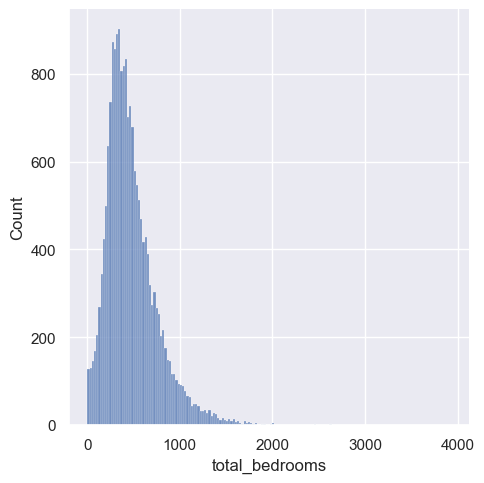

In [21]:
sns.displot(data3['total_bedrooms'])

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\1343410528.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['total_bedrooms'])


<Axes: xlabel='total_bedrooms', ylabel='Density'>

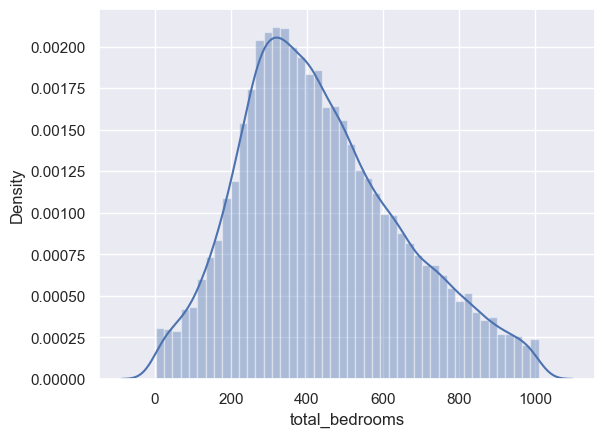

In [22]:
q = data3['total_bedrooms'].quantile(0.95)
data4 = data3[data3['total_bedrooms']<q]
sns.distplot(data4['total_bedrooms'])

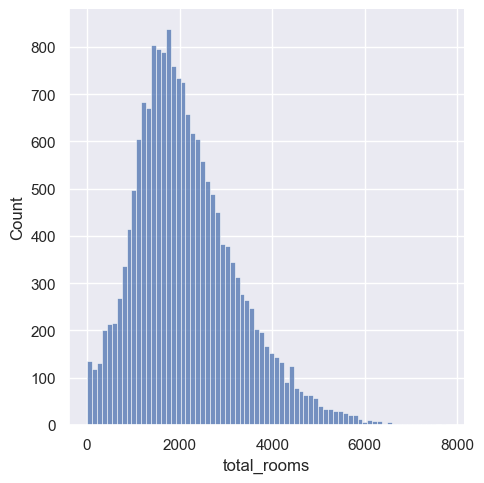

In [23]:
sns.displot(data4['total_rooms'])

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\1388414860.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data5['total_rooms'])


<Axes: xlabel='total_rooms', ylabel='Density'>

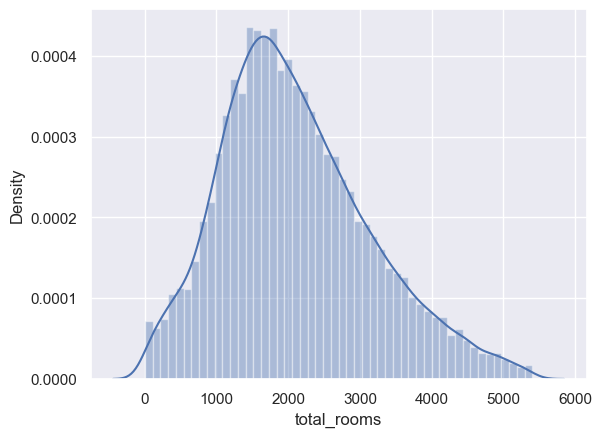

In [24]:
q = data4['total_rooms'].quantile(0.99)
data5 = data4[data4['total_rooms']<q]
sns.distplot(data5['total_rooms'])

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\2730568911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data5['longitude'])


<Axes: xlabel='longitude', ylabel='Density'>

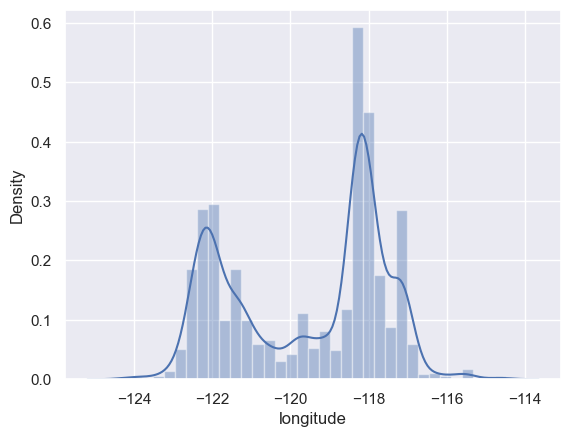

In [25]:
sns.distplot(data5['longitude'])


C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_31476\1932726377.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data7['longitude'])


<Axes: xlabel='longitude', ylabel='Density'>

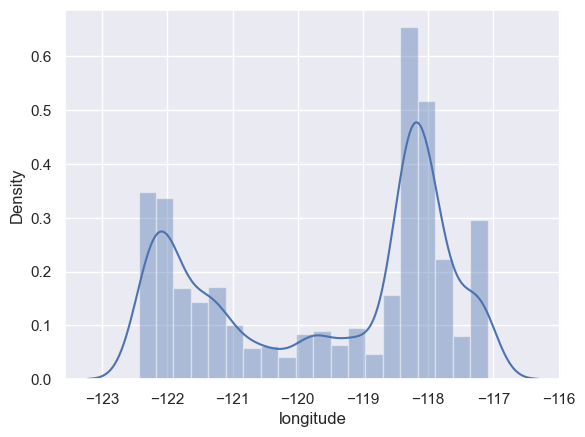

In [26]:
q = data5['longitude'].quantile(0.05)
data6 = data5[data5['longitude']>q]
q = data6['longitude'].quantile(0.95)
data7 = data6[data6['longitude']<q]
sns.distplot(data7['longitude'])

In [27]:
fine_data = data7

In [28]:
num_points = int(0.1 * len(fine_data))

In [30]:
data8 = fine_data[:num_points]

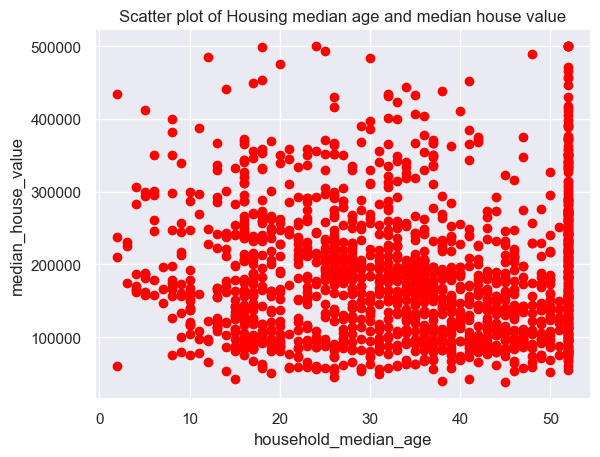

In [31]:
#Data cleaning
plt.scatter(data8['housing_median_age'],  data8['median_house_value'], color = "red")
plt.xlabel("household_median_age")
plt.ylabel("median_house_value")
plt.title("Scatter plot of Housing median age and median house value")
plt.show()

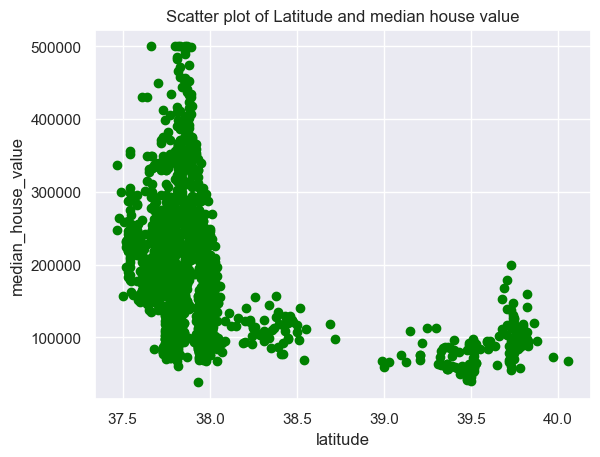

In [32]:
plt.scatter(data8['latitude'],  data8['median_house_value'], color = "green")
plt.xlabel("latitude")
plt.ylabel("median_house_value")
plt.title("Scatter plot of Latitude and median house value")
plt.show()


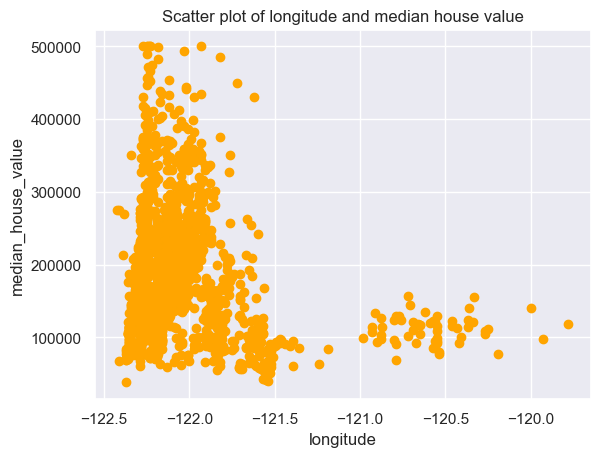

In [33]:
plt.scatter(data8['longitude'],  data8['median_house_value'], color = "orange")
plt.xlabel("longitude")
plt.ylabel("median_house_value")
plt.title("Scatter plot of longitude and median house value")
plt.show()


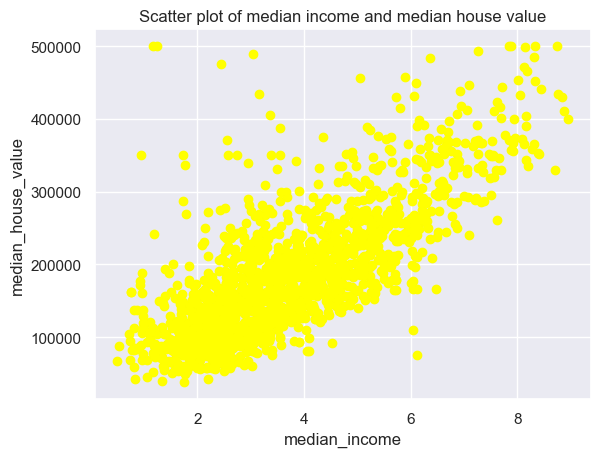

In [34]:
plt.scatter(data8['median_income'],  data8['median_house_value'], color = "yellow")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.title("Scatter plot of median income and median house value")
plt.show()

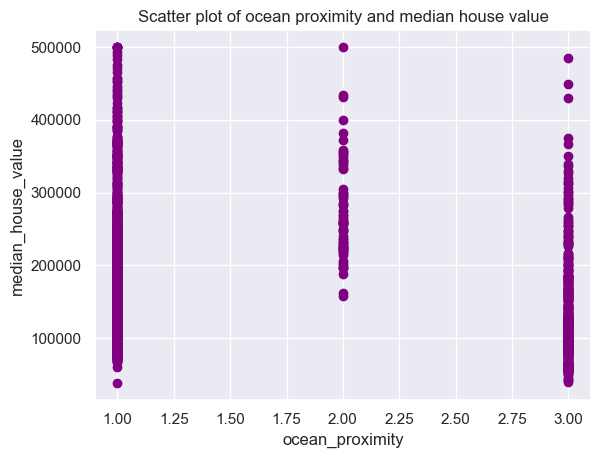

In [35]:
plt.scatter(data8['ocean_proximity'],  data8['median_house_value'], color = "purple")
plt.xlabel("ocean_proximity")
plt.ylabel("median_house_value")
plt.title("Scatter plot of ocean proximity and median house value")
plt.show()


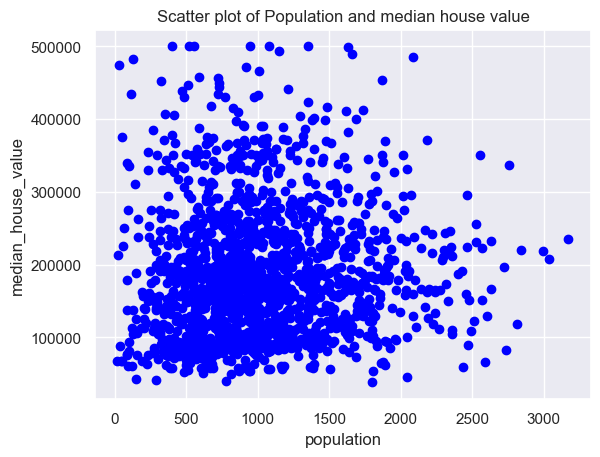

In [36]:
plt.scatter(data8['population'],  data8['median_house_value'], color = "blue")
plt.xlabel("population")
plt.ylabel("median_house_value")
plt.title("Scatter plot of Population and median house value")
plt.show()


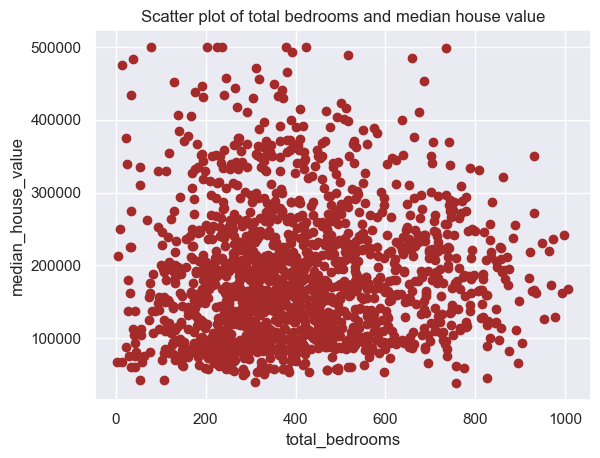

In [37]:
plt.scatter(data8['total_bedrooms'],  data8['median_house_value'], color = "brown")
plt.xlabel("total_bedrooms")
plt.ylabel("median_house_value")
plt.title("Scatter plot of total bedrooms and median house value")
plt.show()


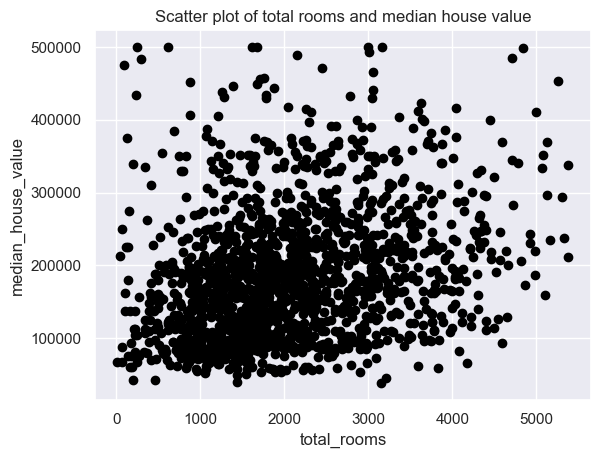

In [38]:
plt.scatter(data8['total_rooms'],  data8['median_house_value'], color = "black")
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")
plt.title("Scatter plot of total rooms and median house value")
plt.show()


In [39]:
#Conclusions: 
# 1. At larger latitudes and longitudes, House price is low but at lower latitudes and longitudes house price varies from low to high
# 2. For a higher median income, house prices are high
# 3. with the increase in number of the bedrooms price of houses are not neccessarily high.

In [40]:
#Declaring inputs and targets variable
inputs = fine_data.drop(['median_house_value'], axis=1)
targets = fine_data['median_house_value']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.33,random_state=365)
#we splitted inputs and targets into train and test set with a ratio 67% and 33% respetively and set the random state to 365 so that in future when data is splitted again same type of splitting is happens

In [42]:
# create a linear regression object
lr = LinearRegression()

# train the estimator using the training set
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
fine_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [44]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

In [45]:
for feature, coeff in zip(features, lr.coef_):
    print(feature, coeff)

longitude -38784.8249410825
latitude -40350.89078597627
housing_median_age 1088.114620381008
total_rooms -26.99302207304534
total_bedrooms 344.46512002963226
population -75.41285100169166
households 4.750630809021232
median_income 47584.07307786499
ocean_proximity -632.177632494145


In [46]:
# Positive and negative coefficients represent the direction and strength of the relationship between each feature and the output variable. A positive coefficient indicates that as the value of the corresponding feature increases, the predicted output value also increases. A negative coefficient indicates that as the value of the corresponding feature increases, the predicted output value decreases. The magnitude of the coefficient represents the strength of the relationship: a larger magnitude indicates a stronger relationship.

In [47]:
#storing predictions on a test set in yhat variable
y_hat_test = lr.predict(x_test)

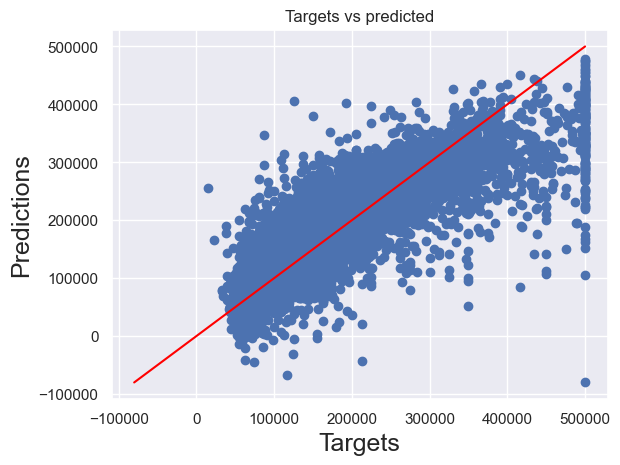

In [48]:
#plotting a graph to see the predicted vs expected
plt.scatter(y_test, y_hat_test)
min_val = min(y_test.min(), y_hat_test.min())
max_val = max(y_test.max(), y_hat_test.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.xlabel("Targets", size = 18)
plt.ylabel("Predictions", size = 18)
plt.title("Targets vs predicted")
plt.show()